In [1]:
import os
parent = !pwd
parent = os.path.join(str(parent[0]), os.pardir)
os.chdir(parent)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
matplotlib.style.use('fivethirtyeight')

In [4]:
gs_all = pd.read_pickle('./data/experiments/grid_search_results.pkl')

gs = gs_all[gs_all['dataset'] == 'val']
gs_pop = gs_all[gs_all['dataset'] == 'val_popular']
gs_unp = gs_all[gs_all['dataset'] == 'val_unpopular']

In [5]:
gs

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall
0,val,skipgram,pagerank,0.0,5,0,0.017787,0.241833,0.027714
1,val,skipgram,pagerank,0.0,5,1,0.018388,0.235461,0.030978
2,val,skipgram,pagerank,0.0,5,5,0.023236,0.222573,0.042232
3,val,skipgram,pagerank,0.0,5,10,0.028110,0.206584,0.052197
4,val,skipgram,pagerank,0.0,5,20,0.035042,0.206912,0.065593
5,val,skipgram,pagerank,0.0,10,0,0.020021,0.241936,0.046855
6,val,skipgram,pagerank,0.0,10,1,0.021151,0.234971,0.053478
7,val,skipgram,pagerank,0.0,10,5,0.027457,0.222006,0.072321
8,val,skipgram,pagerank,0.0,10,10,0.033320,0.206246,0.088726
9,val,skipgram,pagerank,0.0,10,20,0.043315,0.207014,0.124658


In [6]:
gs_random_uniform = pd.read_pickle('./data/experiments/random_uniform_grid_search_results.pkl')
gs_random_weighted = pd.read_pickle('./data/experiments/random_weighted_grid_search_results.pkl')

# Embedding results

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce8be814a8>,
      dtype=object)

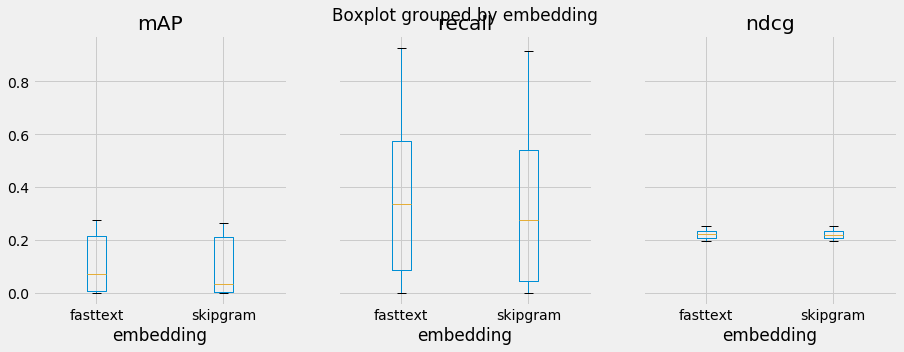

In [7]:
gs.boxplot(['mAP', 'recall', 'ndcg'], 'embedding', figsize=(15,5), layout=(1,3))

# Popularity results

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce8b950f60>,
      dtype=object)

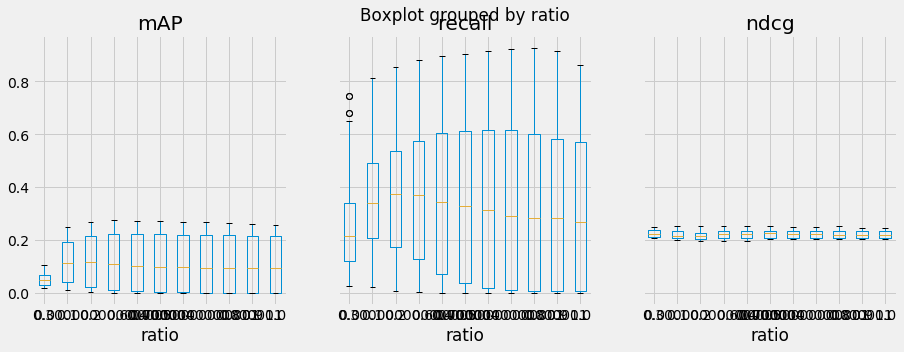

In [8]:
gs.boxplot(['mAP', 'recall', 'ndcg'], 'ratio', figsize=(15,5), layout=(1,3))

# Ratio results

/home/kacper/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


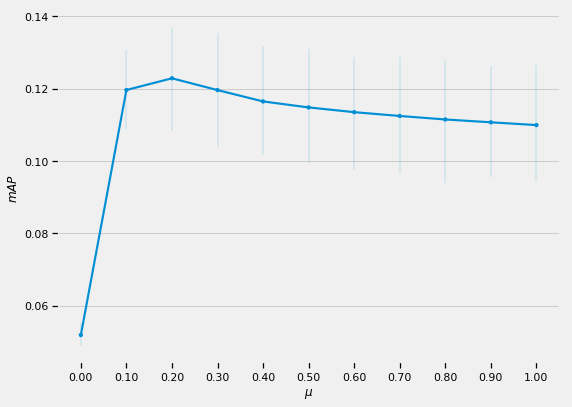

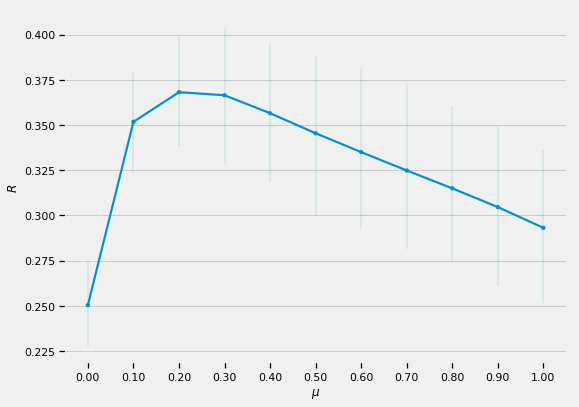

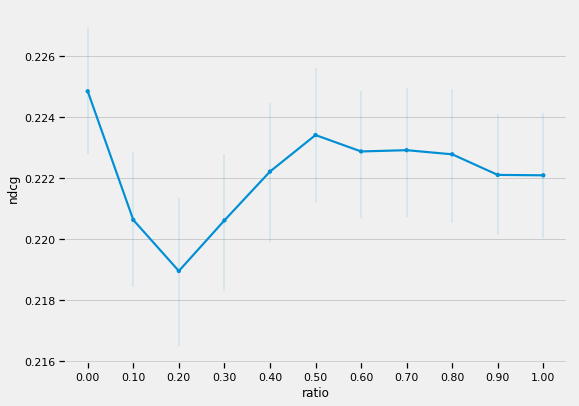

In [9]:
sns.set_context("notebook", rc={"lines.linewidth": 1.2})
plt.figure(figsize=(8,6))
ax = sns.pointplot(gs['ratio'].map('{:,.2f}'.format), gs['mAP'], errwidth=0.2, markers='.')
ax.set(xlabel='$\mu$', ylabel='$mAP$')
plt.savefig('reports/mAP_mu.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(8,6))
ax = sns.pointplot(gs['ratio'].map('{:,.2f}'.format), gs['recall'], errwidth=0.2, markers='.')
ax.set(xlabel='$\mu$', ylabel='$R$')
plt.savefig('reports/recall_mu.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(8,6))
sns.pointplot(gs['ratio'].map('{:,.2f}'.format), gs['ndcg'], errwidth=0.2, markers='.')

# K results

/home/kacper/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(15.204999999999998, 0.5, '$ndcg$'), Text(0.5, 6.739999999999981, '$k$')]

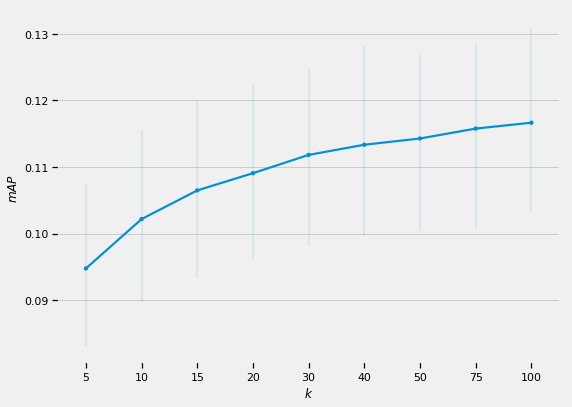

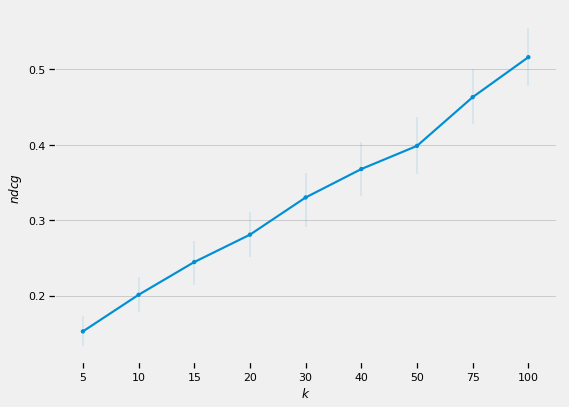

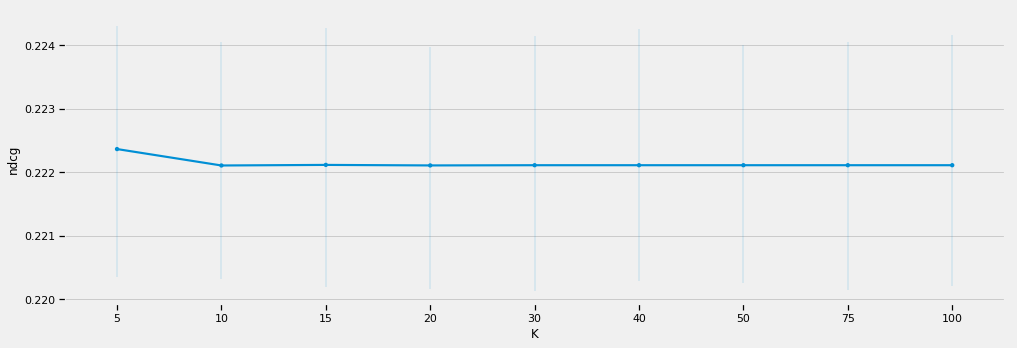

In [12]:
sns.set_context("notebook", rc={"lines.linewidth": 1.2})
plt.figure(figsize=(8,6))
ax = sns.pointplot(gs['K'], gs['mAP'], errwidth=0.2, markers='.')
ax.set(xlabel='$k$', ylabel='$mAP$')
plt.savefig('reports/mAP_K.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(8,6))
ax = sns.pointplot(gs['K'], gs['recall'], errwidth=0.2, markers='.')
ax.set(xlabel='$k$', ylabel='$R$')
plt.savefig('reports/recall_K.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(15,5))
sns.pointplot(gs['K'], gs['ndcg'], errwidth=0.2, markers='.')
ax.set(xlabel='$k$', ylabel='$ndcg$')

# Hashtag occurence limit results

/home/kacper/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


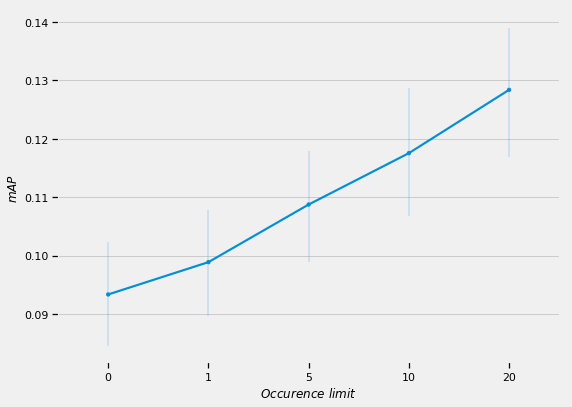

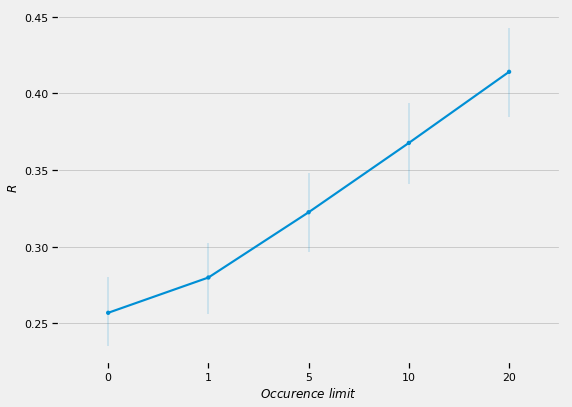

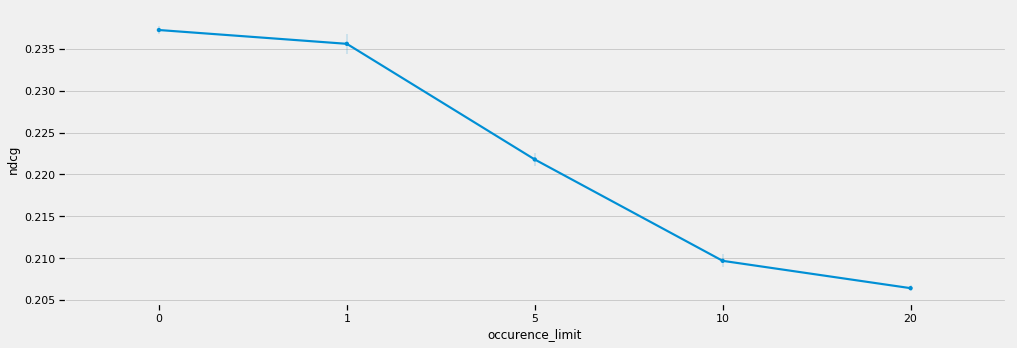

In [13]:
sns.set_context("notebook", rc={"lines.linewidth": 1.2})
plt.figure(figsize=(8,6))
ax = sns.pointplot(gs['occurence_limit'], gs['mAP'], errwidth=0.3, markers='.')
ax.set(xlabel='$Occurence\ limit$', ylabel='$mAP$')
plt.savefig('reports/mAP_occurence.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(8,6))
ax = sns.pointplot(gs['occurence_limit'], gs['recall'], errwidth=0.3, markers='.')
ax.set(xlabel='$Occurence\ limit$', ylabel='$R$')
plt.savefig('reports/recall_occurence.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(15,5))
sns.pointplot(gs['occurence_limit'], gs['ndcg'], errwidth=0.3, markers='.')

# Popular vs unpopular

/home/kacper/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


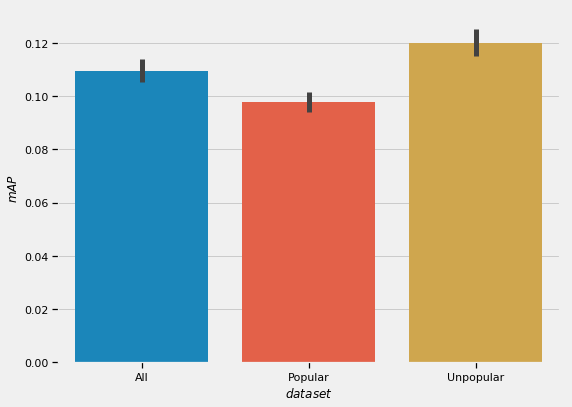

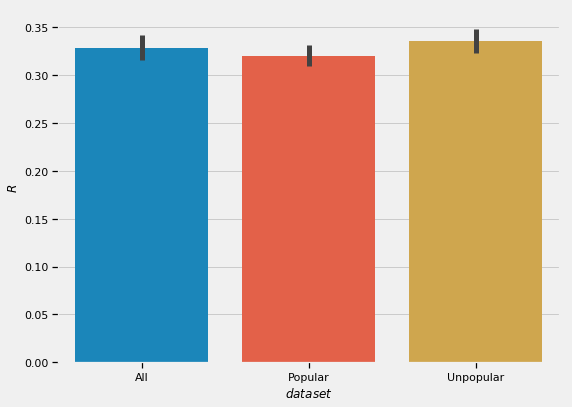

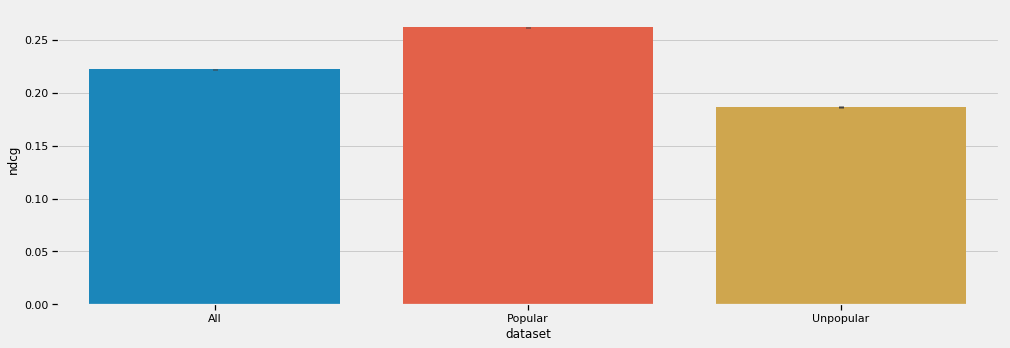

In [39]:
plt.figure(figsize=(8,6))
ax = sns.barplot(gs_all['dataset'].replace({"val": "All", "val_popular": "Popular", "val_unpopular": "Unpopular"}), gs_all['mAP'], errwidth=5)
ax.set(xlabel='$dataset$', ylabel='$mAP$', label=["All", "Popular", "Unpopular"])
plt.savefig('reports/mAP_dataset.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(8,6))
ax = sns.barplot(gs_all['dataset'].replace({"val": "All", "val_popular": "Popular", "val_unpopular": "Unpopular"}), gs_all['recall'], errwidth=5)
ax.set(xlabel='$dataset$', ylabel='$R$', label=["All", "Popular", "Unpopular"])
plt.savefig('reports/recall_dataset.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(15,5))
sns.barplot(gs_all['dataset'], gs_all['ndcg'], errwidth=5)

/home/kacper/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


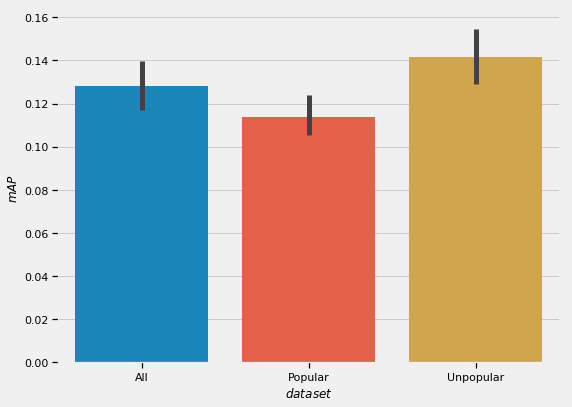

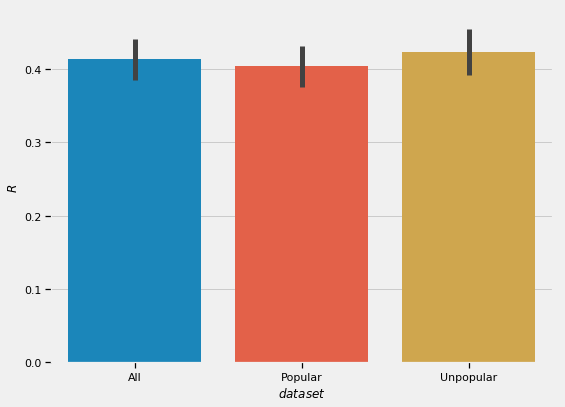

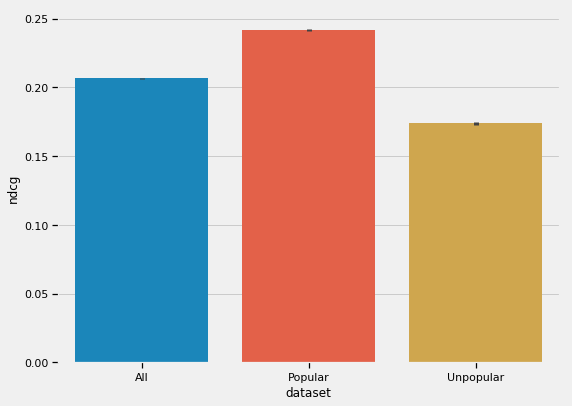

In [42]:
plt.figure(figsize=(8,6))
gs_all['dataset'] = gs_all['dataset'].replace({"val": "All", "val_popular": "Popular", "val_unpopular": "Unpopular"})
d = gs_all[(gs_all['occurence_limit']==20)]
#d = d[d['K']<=10]
ax = sns.barplot(d['dataset'], d['mAP'], errwidth=5)
ax.set(xlabel='$dataset$', ylabel='$mAP$')
plt.savefig('reports/mAP_dataset_limit_20.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(8,6))
ax = sns.barplot(d['dataset'], d['recall'], errwidth=5)
ax.set(xlabel='$dataset$', ylabel='$R$')
plt.savefig('reports/recall_dataset_limit_20.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(8,6))
sns.barplot(d['dataset'], d['ndcg'], errwidth=5)

In [16]:
d = gs.copy()
d =d[d['K'] <20]

In [17]:
d['avg'] = (d.mAP + d.recall + d.ndcg) /3

In [18]:
d[d['avg'] == d['avg'].max()]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall,avg
1184,val,fasttext,pagerank,0.4,15,20,0.257592,0.200656,0.598698,0.352315


In [19]:
l = gs_pop.copy()
l[(l['embedding'] == 'fasttext') &
  (l['popularity'] == 'pagerank') &
  (l['ratio'] == 0.4) &
  (l['K'] == 15) &
  (l['occurence_limit'] == 20)]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall
3164,val_popular,fasttext,pagerank,0.4,15,20,0.21933,0.245231,0.533505


In [20]:
l = gs_unp.copy()
l[(l['embedding'] == 'fasttext') &
  (l['popularity'] == 'pagerank') &
  (l['ratio'] == 0.4) &
  (l['K'] == 15) &
  (l['occurence_limit'] == 20)]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall
5144,val_unpopular,fasttext,pagerank,0.4,15,20,0.29307,0.159324,0.659147


In [21]:
d[d['mAP'] == d['mAP'].max()]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall,avg
1139,val,fasttext,pagerank,0.3,15,20,0.261354,0.200157,0.583553,0.348355


In [22]:
d[d['recall'] == d['recall'].max()]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall,avg
1184,val,fasttext,pagerank,0.4,15,20,0.257592,0.200656,0.598698,0.352315


In [23]:
d[d['ndcg'] == d['ndcg'].max()]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall,avg
641,val,skipgram,mean_retweets,0.3,15,1,0.002913,0.252891,0.017888,0.091231


In [24]:
h = gs_all.groupby(['dataset', 'ratio']).agg('mean').reset_index()
h
#h = h.pivot_table(['mAP','recall','ndcg'],index=['ratio','dataset']).reset_index()
h = h.pivot_table(['mAP','recall','ndcg'],index=['ratio'], columns=['dataset']).reset_index()
h

ratio       mAP                          ndcg                      \
dataset             All   Popular Unpopular       All   Popular Unpopular   
0         0.0  0.051846  0.058220  0.046137  0.224854  0.261193  0.192102   
1         0.1  0.119609  0.111827  0.126701  0.220638  0.260067  0.185093   
2         0.2  0.122854  0.110276  0.134256  0.218964  0.260883  0.181174   
3         0.3  0.119591  0.105616  0.132240  0.220622  0.261881  0.183423   
4         0.4  0.116452  0.102087  0.129443  0.222222  0.263045  0.185424   
5         0.5  0.114792  0.100548  0.127670  0.223421  0.263695  0.187114   
6         0.6  0.113483  0.099212  0.126383  0.222883  0.262857  0.186845   
7         0.7  0.112429  0.098171  0.125316  0.222924  0.262690  0.187075   
8         0.8  0.111464  0.097222  0.124334  0.222789  0.261994  0.187446   
9         0.9  0.110682  0.096416  0.123574  0.222114  0.260792  0.187245   
10        1.0  0.109909  0.095714  0.122737  0.222101  0.260736  0.187270   

           recall                      
dataset       All   Popular Unpopular  
0        0.250272  0.251855  0.249008  
1        0.351700  0.337653  0.364515  
2        0.368117  0.354459  0.380535  
3        0.366424  0.354526  0.377215  
4        0.356489  0.346451  0.365573  
5        0.345407  0.336525  0.353424  
6        0.334953  0.327198  0.341927  
7        0.324811  0.317557  0.331322  
8        0.314916  0.307716  0.321370  
9        0.304542  0.296812  0.311473  
10       0.293085  0.285800  0.299622

In [25]:
tst = h[h['ratio']>0]

(h['mAP']['Popular'] > h['mAP']['Unpopular']).any(), (tst['mAP']['Popular'] > tst['mAP']['Unpopular']).any()

(True, False)

In [26]:
(h['recall']['Popular'] > h['recall']['Unpopular']).any(), (tst['recall']['Popular'] > tst['recall']['Unpopular']).any()

(True, False)

In [27]:
(h['ndcg']['Popular'] > h['ndcg']['Unpopular']).any(), (tst['ndcg']['Popular'] > tst['ndcg']['Unpopular']).any()

(True, True)

# Random results

In [28]:
ru = gs_random_uniform.copy()
ru['method'] = 'Random uniform'

rw = gs_random_weighted.copy()
rw['method'] = 'Random weighted'

rand = pd.concat([ru, rw])

our = gs.copy()
our['method'] = 'Our'

our_vs_rand = pd.concat([rand,our])

/home/kacper/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


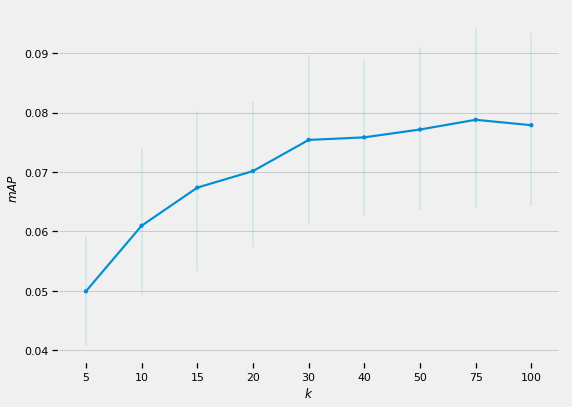

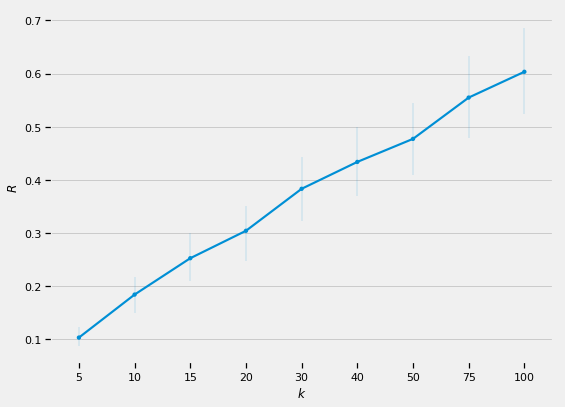

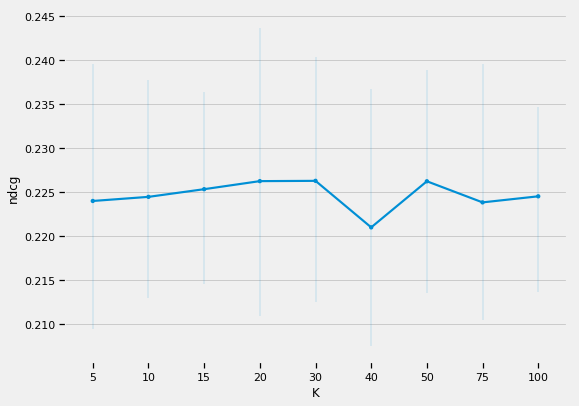

In [29]:
plt.figure(figsize=(8,6))
ax = sns.pointplot(rw['K'], rw['mAP'], errwidth=0.2, markers='.')
ax.set(xlabel='$k$', ylabel='$mAP$')
plt.savefig('reports/random_mAP_K.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(8,6))
ax = sns.pointplot(rw['K'], rw['recall'], errwidth=0.2, markers='.')
ax.set(xlabel='$k$', ylabel='$R$')
plt.savefig('reports/random_recall_K.pdf', transparent=True, bbox_inches='tight')

plt.figure(figsize=(8,6))
sns.pointplot(rw['K'], rw['ndcg'], errwidth=0.2, markers='.')

/home/kacper/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x360 with 0 Axes>

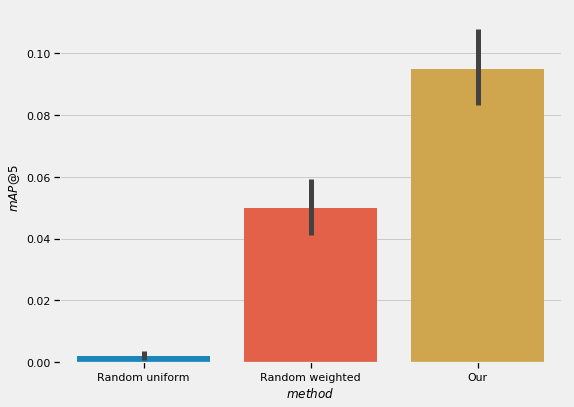

In [33]:
plt.figure(figsize=(15,5))
#d = gs_random_uniform[(gs_random_uniform['occurence_limit']==20) & (gs_all['ratio'] >0.9)]
d = our_vs_rand.copy()
d = d[d['K']==5]

plt.figure(figsize=(8,6))
ax = sns.barplot(d['method'], d['mAP'], errwidth=5)
ax.set(xlabel='$method$', ylabel='$mAP@5$')
# plt.title('Mean Average Precision with top 5 recommendations\nOur vs. baseline')

plt.savefig('reports/mAP_top5.pdf', transparent=True, bbox_inches='tight')

In [30]:
d.groupby('method').agg({'mAP': 'mean', 'recall': 'mean'})

,mAP,recall
method,,
Our,0.094757,0.152658
Random uniform,0.001975,0.004628
Random weighted,0.049943,0.103602


/home/kacper/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


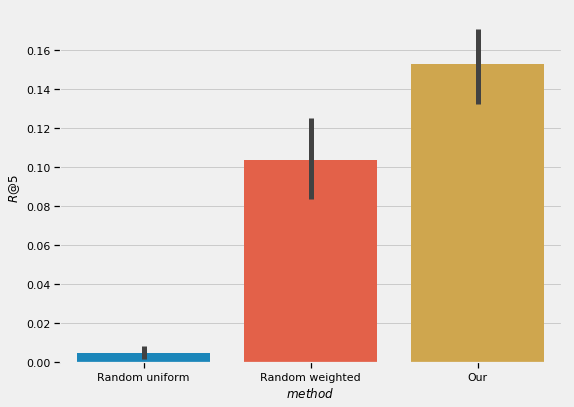

In [34]:
d = our_vs_rand.copy()
d = d[d['K']==5]

plt.figure(figsize=(8,6))
ax = sns.barplot(d['method'], d['recall'], errwidth=5)
ax.set(xlabel='$method$', ylabel='$R@5$')
# plt.title('Recall with top 5 recommendations\nOur vs. baseline')
plt.savefig('reports/recall_top5.pdf', transparent=True, bbox_inches='tight')

/home/kacper/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


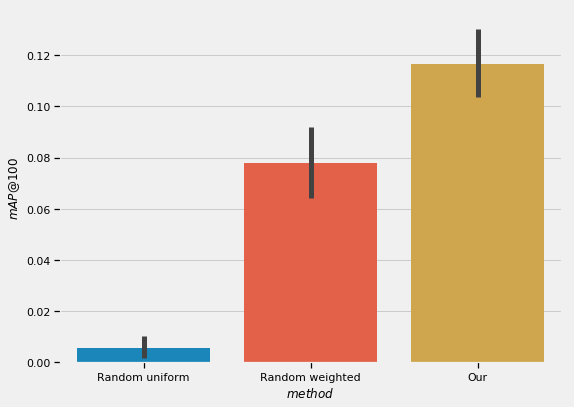

In [35]:
#d = gs_random_uniform[(gs_random_uniform['occurence_limit']==20) & (gs_all['ratio'] >0.9)]
d = our_vs_rand.copy()
d = d[d['K']==100]

plt.figure(figsize=(8,6))
ax = sns.barplot(d['method'], d['mAP'], errwidth=5)
ax.set(xlabel='$method$', ylabel='$mAP@100$')
# plt.title('Mean Average Precision with top 5 recommendations\nOur vs. baseline')

plt.savefig('reports/mAP_top100.pdf', transparent=True, bbox_inches='tight')

/home/kacper/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


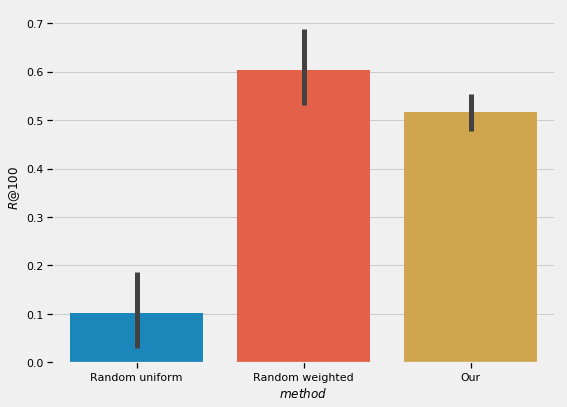

In [36]:
d = our_vs_rand.copy()
d = d[d['K']==100]

plt.figure(figsize=(8,6))
ax = sns.barplot(d['method'], d['recall'], errwidth=5)
ax.set(xlabel='$method$', ylabel='$R@100$')
# plt.title('Recall with top 5 recommendations\nOur vs. baseline')
plt.savefig('reports/recall_top100.pdf', transparent=True, bbox_inches='tight')